# 7.3 使用单层神经网络实现鸢尾花的分类

### 1.任务描述

- 下载鸢尾花数据集
- 设计单层神经网络
- 训练网络，求解模型
- 记录迭代过程中的损失和准确率
- 对损失和准确率进行可视化输出


### 2.知识准备

见教程。

### 3.任务分析

1. 网络结构设计

使用神经网络实现多分类问题的实现过程和Softmax回归几乎是一样的，只是从设计和实现神经网络的角度来重新描述这个过程，神经网络的设计包括如下内容：

- 搭建神经网络的结构，主要包括设计几层网络、每层网络有几个节点、节点之间是如何连接的等
- 根据任务目标，选择合适的激活函数
- 根据任务目标，选择合适的损失函数

假设鸢尾花数据集是线性可分的，那么，实现鸢尾花的分类可以选择没有隐藏层的单层神经网络，如图7-3-4所示。

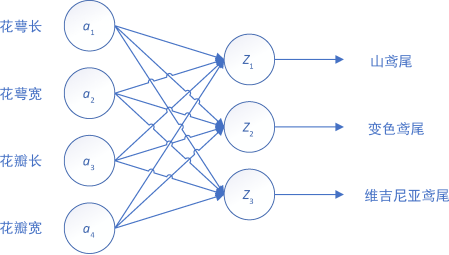

图7-3-4  没有隐藏的单层神经网络实现鸢尾花分类

神经网络的具体信息如下：

- 输入层：输入层的节点数由样本特征的个数决定，在鸢尾花数据集中，每个样本有4个特征，所以在输入层设计4个节点
- 输出层：输出层的节点个数由分类的类别数决定，鸢尾花被分为3类，所以输出层设计3个节点，分别对应不同的种类
- 标签格式：因为鸢尾花的分类是多分类问题，所以标签值使用独热编码格式表示
- 激活函数：因为鸢尾花的分类是多分类问题，所以使用Softmax函数作为激活函数
- 损失函数：使用交叉熵损失函数来计算误差



2. 神经网络数学模型

神经网络是一种数学模型，节点之间的关系描述的是数学运算，因此，实现神经网络，就是通过多维数组来实现这些数学运算。

在鸢尾花的训练集中有120个样本，每个样本有4个特征，如果一次输入120个样本，那么样本的特征X是一个形状为(120,4)的二维数组。

$X=\left [ \begin{array}{c} 
  x_1^1&x_1^2&x_1^3&x_1^4\\
  x_2^1&x_2^2&x_2^3&x_2^4\\
  ...&...&...&...\\
  x_{120}^1&x_{120}^2&x_{120}^3&x_{120}^4
\end{array} \right]$

样本的标签Y是一个形状为(120,3)的二维数组，其中每行表示的是鸢尾花的类别的独热编码。

$Y=\left [ \begin{array}{c} 
  y_1^1&y_1^2&y_1^3\\
  y_2^1&y_2^2&y_2^3\\
  ...&...&...\\
  y_{120}^1&y_{120}^2&y_{120}^3&
\end{array} \right ]$

经过神经网络运算后，输出的结果$\hat{Y}$是预测值，是一个形状为(120,3)的二维数组，是每个样本分别属于不同类别的概率。

$\hat{Y}=\left [ \begin{array}{c} 
  \hat{y}_1^1&\hat{y}_1^2&\hat{y}_1^3\\
  \hat{y}_2^1&\hat{y}_2^2&\hat{y}_2^3\\
  ...&...&...\\
  \hat{y}_{120}^1&\hat{y}_{120}^2&\hat{y}_{120}^3&
\end{array} \right ]$

输入层和输出层之间连接的权值，构成一个形状是(4,3)的权值矩阵W：

$Y=\left [ \begin{array}{c} 
w_{11}&w_{12}&w_{12}\\
w_{21}&w_{22}&w_{23}\\
w_{31}&w_{32}&w_{33}\\
w_{41}&w_{42}&w_{43}
\end{array} \right ]$

输出层的每个神经元还有$B=[b_1,b_2,b_3]$一个偏置项b，把它们表示为一个一维数组：，它和W共同构成了神经网络的模型参数。$Y=XW+B$输入数据、模型参数和输出数据之间的关系为，这就是神经网络的数学模型。


### 4.任务实施


执行代码

0 ,训练集准确率: 0.083333336 ,训练集损失: 2.3513663 ,测试集准确率: 0.16666667 ,测试集损失: 1.9915375
10 ,训练集准确率: 0.93333334 ,训练集损失: 0.28643906 ,测试集准确率: 0.96666664 ,测试集损失: 0.37351257
20 ,训练集准确率: 0.94166666 ,训练集损失: 0.23959275 ,测试集准确率: 0.96666664 ,测试集损失: 0.30281308
30 ,训练集准确率: 0.94166666 ,训练集损失: 0.21358398 ,测试集准确率: 0.96666664 ,测试集损失: 0.26242507
40 ,训练集准确率: 0.94166666 ,训练集损失: 0.1956733 ,测试集准确率: 0.96666664 ,测试集损失: 0.23500869
50 ,训练集准确率: 0.95 ,训练集损失: 0.18205029 ,测试集准确率: 0.96666664 ,测试集损失: 0.21461551


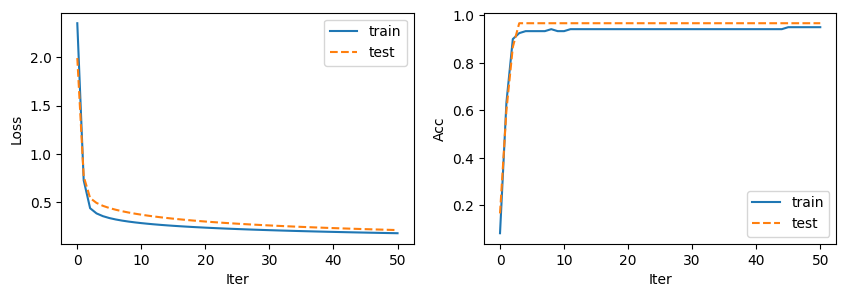

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import tensorflow as tf

# 1，数据集下载
# 1.1，下载
# 训练集
TRAIN_URL="http://download.tensorflow.org/data/iris_training.csv"
train_path=tf.keras.utils.get_file(TRAIN_URL.split('/')[-1], TRAIN_URL)

# 测试集
TEST_URL="http://download.tensorflow.org/data/iris_test.csv"
test_path=tf.keras.utils.get_file(TEST_URL.split('/')[-1],TEST_URL)

# 1.2，使用Pandas读取数据，得到DataFrame格式数据
df_iris_test=pd.read_csv(test_path,header=0)
df_iris_train=pd.read_csv(train_path,header=0)
# 1.3，转换成NumPy格式
iris_train=np.array(df_iris_train)
iris_test=np.array(df_iris_test)

# print(iris_train.shape)
# print(iris_test.shape)

# 2，数据预处理
# 2.1，拆分样本特征和标签
x_train = iris_train[:,0:4]
y_train = iris_train[:,4]
# print(x_train.shape,y_train.shape)

x_test = iris_test[:,0:4]
y_test = iris_test[:,4]
# print(x_test.shape,y_test.shape)

# 2.2，数据归一化
# 由于样本的4个特征值尺度相同，因此不用进行归一化

# 2.3，数据中心化
# 需要按列中心化，所以指定axis=0
x_train=x_train-np.mean(x_train,axis=0)
x_test=x_test-np.mean(x_test,axis=0)

# 2.4，类型转换
X_train=tf.cast(x_train,tf.float32)
# 将标签转为int32，再转为独热编码
Y_train=tf.one_hot(tf.constant(y_train,tf.int32),3)

X_test=tf.cast(x_test,tf.float32)
# 将标签转为int32，再转为独热编码
Y_test=tf.one_hot(tf.constant(y_test,tf.int32),3)

# 3，设置超参数
# 学习率
learn_rate=0.5
# 迭代次数
iter=50
# 显示频率
display_step=10

# 模型参数
np.random.seed(612)
# 二维(4,3)，初始化为随机数
W=tf.Variable(np.random.randn(4,3),dtype=tf.float32)
# 一维(3)，初始化为0
B=tf.Variable(np.random.randn(3),dtype=tf.float32)

# 4，训练模型
# 训练准确率
acc_train=[]
# 测试准确率
acc_test=[]
# 训练损失
cce_train=[]
# 测试损失
cce_test=[]

for i in range(0,iter+1):
    with tf.GradientTape() as tape:
        # 计算训练集线性输出
        PRED_train=tf.matmul(X_train,W)+B
        # 训练集预测值，一组概率值
        PRED_train=tf.nn.softmax(PRED_train)
        # 训练集交叉熵损失
        Loss_train=tf.reduce_mean(tf.keras.metrics.categorical_crossentropy
(y_true=Y_train,y_pred=PRED_train))
    # 计算测试集线性输出    
    PRED_test=tf.matmul(X_test,W)+B
    # 测试集预测值，一组概率值
    PRED_test=tf.nn.softmax(PRED_test)
    # 测试集交叉熵损失
    Loss_test=tf.reduce_mean(tf.keras.metrics.categorical_crossentropy
(y_true=Y_test,y_pred=PRED_test))

    # 计算准确率
    # 训练集准确率
    accuracy_train=tf.reduce_mean(tf.cast(tf.equal(tf.argmax(PRED_train.
numpy(),1),y_train),tf.float32))
    # 测试集准确率
    accuracy_test=tf.reduce_mean(tf.cast(tf.equal(tf.argmax (PRED_test.numpy(),1),y_test),tf.float32))
    # 将损失添加到列表
    cce_train.append(Loss_train)
    cce_test.append(Loss_test)
    # 将准确率添加到列表
    acc_train.append(accuracy_train)
    acc_test.append(accuracy_test)
    # 计算偏导数
    grads = tape.gradient(Loss_train,[W,B])
    # 更新偏导数
    W.assign_sub(learn_rate*grads[0])
    B.assign_sub(learn_rate*grads[1])
    # 显示迭代次数、训练集准确率、训练集损失、测试集准确率、测试集损失
    if i % display_step==0:
        print(i,',训练集准确率:',accuracy_train.numpy(),',训练集损失:',Loss_train.numpy(),',测试集准确率:',accuracy_test.numpy(),',测试集损失:',Loss_test.numpy())
 

# 5，可视化结果
plt.figure(figsize=(10,3))
# 5.1，绘制损失
plt.subplot(121)
plt.plot(cce_train, label="train")
plt.plot(cce_test, '--', label="test")
plt.xlabel("Iter")
plt.ylabel("Loss")
plt.legend(["train","test"])

# 5.2，绘制准确率
plt.subplot(122)
plt.plot(acc_train, label="train")
plt.plot(acc_test, '--', label="test")
plt.xlabel("Iter")
plt.ylabel("Acc")
plt.legend(["train","test"])
plt.show()